In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
df = pd.read_csv('one_dataset.csv')
df.rename(columns = {
    'size_sqft' : 'size',
    "bedrooms" : "rooms",
    "distance_km" : "distance"
}, inplace=True)
df.head()

,size,rooms,distance,rent
0,1926,3,12,19621
1,1660,4,13,19638
2,1930,1,9,16765
3,1895,4,13,22014
4,1844,3,13,15321


In [12]:
x = df[['size', 'rooms', 'distance']].values.reshape(-1,3)
y = df['rent'].values.reshape(-1,1)
sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)
jb.dump( sc,'scaler_one.pkl')

['scaler_one.pkl']

In [18]:
def rent(size,rooms,distance):
    model_path = 'one.keras'
    inp = np.array([[size,rooms,distance]])
    sc = jb.load('scaler_one.pkl')
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        model.save('one.keras')
        pred = model.predict(x_norm)
        lv = hist.history['loss']
        mae = mean_absolute_error(y, pred)
        mse = mean_squared_error(y, pred)
        rse = np.sqrt(mse)
        r2 = r2_score(y, pred)

        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss values')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.title('Actual vs Predicted')
        plt.show()
    return model.predict(np.array(inp))[0][0]*(yx - yn)+yn

Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.3492
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3359
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3001
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2824
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2618
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2384
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2085
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1832
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1730
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1623
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1508
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1149
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1069
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0978
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0799
Epoch 16/500
2/2 ━━━━━━━━━━━━━━

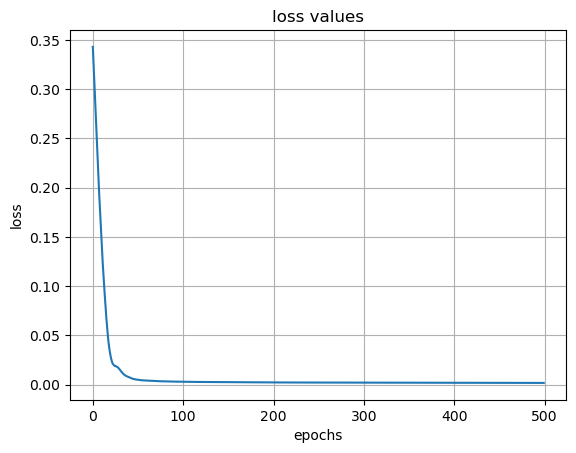

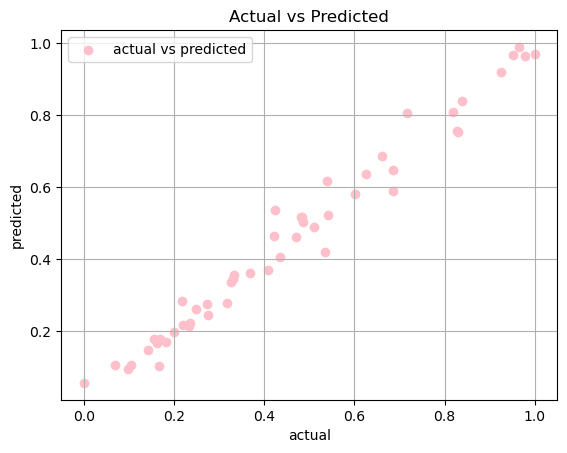

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
16538.51239299774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
18996.737183749676
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
24891.58673298359


In [19]:
print(rent(1200, 3, 3))  # should be close to 18000
print(rent(1926, 3, 12))  # should be close to 19621
print(rent(2020, 3, 2))  # should be close to 19621
